In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
data,target = make_moons(n_samples=400, noise=0.1)

In [12]:
data.shape

(400, 2)

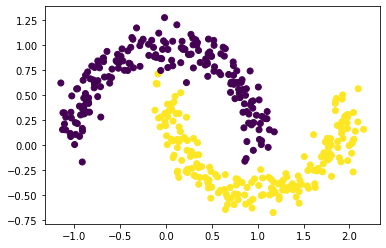

In [13]:
plt.scatter(data[:,0],data[:,1],c=target)

In [28]:
def plot_boundary(pred):
    x1 = np.arange(min(data[:,0]) - 1, max(data[:,0]) + 1, 0.01)
    x2 = np.arange(min(data[:,1]) - 1, max(data[:,1]) + 1, 0.01)
    xx,yy = np.meshgrid(x1,x2)
    x = np.array([xx.flatten(), yy.flatten()]).T
    z = pred(x)
    z = z.reshape(xx.shape)
    plt.contourf(xx,yy,z)
    plt.scatter(data[:,0], data[:,1], c = target, cmap = ListedColormap(('white','red')))
    plt.show()

In [16]:
reg = LogisticRegression()
reg.fit(data,target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = reg.predict(data)

In [18]:
accuracy_score(target, y_pred)

0.875

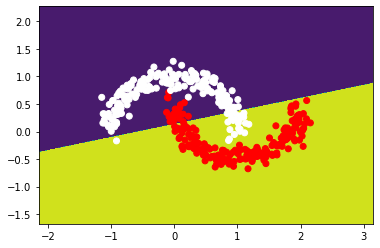

In [29]:
plot_boundary(lambda x : reg.predict(x))

In [36]:
svm = SVC(kernel='rbf')
svm.fit(data,target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred = svm.predict(data)
accuracy_score(target, y_pred)

0.9875

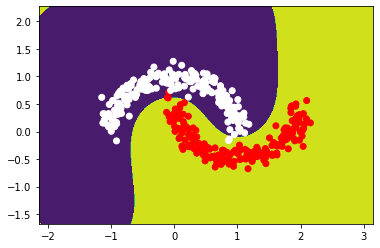

In [38]:
plot_boundary(lambda x : svm.predict(x))